# 3D Bin packing

Given the array of the 3d boxes (blocks) and the bin size (width, height and depth) find the minimum number of bins to fit all the given boxes.

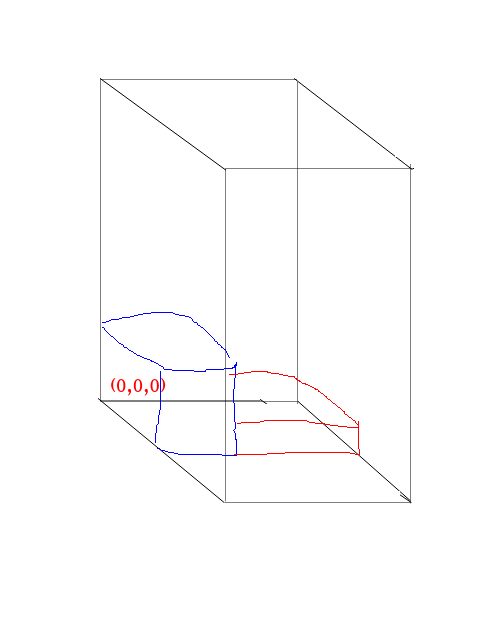

In [12]:
from itertools import permutations

In [2]:
class Box:
    def __init__(self, w:int, d:int, h:int):
        self.width = w
        self.depth = d
        self.height = h
        self.position = None
        
    def __repr__(self):
        return f"Box(w={self.width}, d={self.depth}, h={self.height}, pos={self.position})"

In [3]:
b = Box(2,3,5)
b

Box(w=2, d=3, h=5, pos=None)

In [ ]:
class Bin:
    def __init__(self, w: int, d: int, h: int):
        self.width = w
        self.depth = d
        self.height = h
        self.boxes = []  # List of boxes in the bin
        self.top_surface = [[0] * d for _ in range(w)]  # Tracks the height at each (x, y) position

    def can_fit(self, b: Box, x: int, y: int, z: int) -> bool:
        """
        Check if the box can fit at position (x, y, z) without overlapping others,
        staying within the bin's dimensions, and being properly supported.
        """
        # Check if the box fits within the bin boundaries
        if x + b.width > self.width or y + b.depth > self.depth or z + b.height > self.height:
            return False

        # Check for overlap with existing boxes
        for placed_box in self.boxes:
            px, py, pz = placed_box.position
            if not (
                x + b.width <= px or px + placed_box.width <= x or
                y + b.depth <= py or py + placed_box.depth <= y or
                z + b.height <= pz or pz + placed_box.height <= z
            ):
                return False

        # Check if the box is supported (must rest on the bottom or another box)
        for dx in range(b.width):
            for dy in range(b.depth):
                if z > self.top_surface[x + dx][y + dy]:
                    return False

        return True

    def add_box(self, b: Box) -> bool:
        """
        Try to place the box in the bin. If successful, assign its position and return True.
        Otherwise, return False.
        """
        # TODO fix this
        for x in range(0, self.width - b.width + 1):
            for y in range(0, self.depth - b.depth + 1):
                z = max(self.top_surface[x + dx][y + dy] for dx in range(b.width) for dy in range(b.depth))
                if self.can_fit(b, x, y, z):
                    b.position = (x, y, z)
                    self.boxes.append(b)

                    # Update the top surface
                    for dx in range(b.width):
                        for dy in range(b.depth):
                            self.top_surface[x + dx][y + dy] = z + b.height
                    return True

        return False

    def __repr__(self):
        return f"Bin(w={self.width}, d={self.depth}, h={self.height}, boxes={self.boxes})"


In [21]:
def pack_boxes_into_bins(boxes, bin_size):
    """
    Put all boxes in bins in the given order.
    """
    bins = []
    for box in boxes:
        # Try to place the box in an existing bin
        placed = False
        for bin in bins:
            if bin.add_box(box):
                placed = True
                break
        # If the box doesn't fit in any existing bin, create a new bin
        if not placed:
            new_bin = Bin(*bin_size)
            new_bin.add_box(box)
            bins.append(new_bin)
    return bins

In [22]:
def brute_force(boxes, bin_size):
    best_solution = None
    for p in permutations(boxes):
        sol = pack_boxes_into_bins(boxes,bin_size)
        if best_solution is None or len(sol) < len(best_solution):
            best_solution = sol 
    return sol

In [27]:
boxes = [
    Box(1, 1, 1),
    Box(1, 1, 1),
    Box(1, 1, 1),
    Box(3, 3, 1),
    Box(3, 3, 1),
]

bin_size = (3, 3, 3)
bins = brute_force(boxes, bin_size)

print(f"Number of bins used: {len(bins)}")
for i, bin in enumerate(bins, 1):
    print(f"Bin {i}: {bin}")



Number of bins used: 2
Bin 1: Bin(w=3, d=3, h=3, boxes=[Box(w=1, d=1, h=1, pos=(0, 0, 0)), Box(w=1, d=1, h=1, pos=(0, 0, 1)), Box(w=1, d=1, h=1, pos=(0, 0, 2))])
Bin 2: Bin(w=3, d=3, h=3, boxes=[Box(w=3, d=3, h=1, pos=(0, 0, 0)), Box(w=3, d=3, h=1, pos=(0, 0, 1))])
